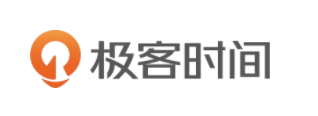

<class 'PIL.PngImagePlugin.PngImageFile'>


In [15]:
from PIL import Image
from torchvision import transforms

img = Image.open("./data/jk.png")
display(img)
print(type(img))

In [4]:
img1 = transforms.ToTensor()(img)
print(type(img1))

<class 'torch.Tensor'>


In [6]:
img2 = transforms.ToPILImage()(img1)
print(type(img2))

<class 'PIL.Image.Image'>


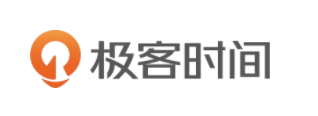

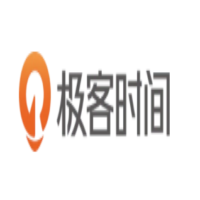

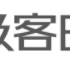

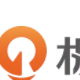

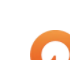

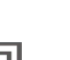

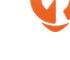

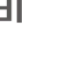

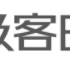

In [17]:
display(img)
resize_img_oper = transforms.Resize((200,200), interpolation=transforms.InterpolationMode.BILINEAR)
img_resize = resize_img_oper(img)
display(img_resize)

# 定义剪裁操作
center_crop_oper = transforms.CenterCrop((60,70))
random_crop_oper = transforms.RandomCrop((80,80))
five_crop_oper = transforms.FiveCrop((60,70))

img_center = center_crop_oper(img)
display(img_center)

img_random = random_crop_oper(img)
display(img_random)

img_five = five_crop_oper(img)
for img_single in img_five:
    display(img_single)


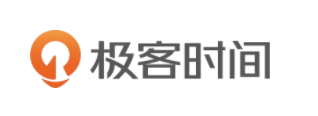

shape (318, 116)
shape:  torch.Size([3, 116, 318])


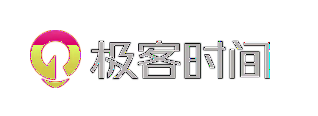

In [35]:
import torch

norm_oper = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5), False)
display(img)
print("shape", img.size)
img_before_norm = torch.index_select(transforms.ToTensor()(img), 0, torch.tensor([0,1,2]))
print("shape: ", img_before_norm.shape)
tensor_after_norm = norm_oper(img_before_norm)
img_after_norm = transforms.ToPILImage()(tensor_after_norm)
display(img_after_norm)

In [38]:
from torchvision import datasets

my_transform = transforms.Compose([transforms.ToTensor(),
                                   transforms.Normalize((0.5), (0.5))]
)
mnist_data = datasets.MNIST(root='./data',
                            train=True,
                            transform=my_transform,
                            target_transform=None,
                            download=True )

item = mnist_data.__getitem__(0)
print(type(item[0]))
display(transforms.ToPILImage()(item[0]))

<class 'torch.Tensor'>
